# MNIST Classifier Model

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
import keras
from keras.datasets import mnist

import tensorflow as tf

from sklearn.model_selection import train_test_split

## Load and Visualize Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


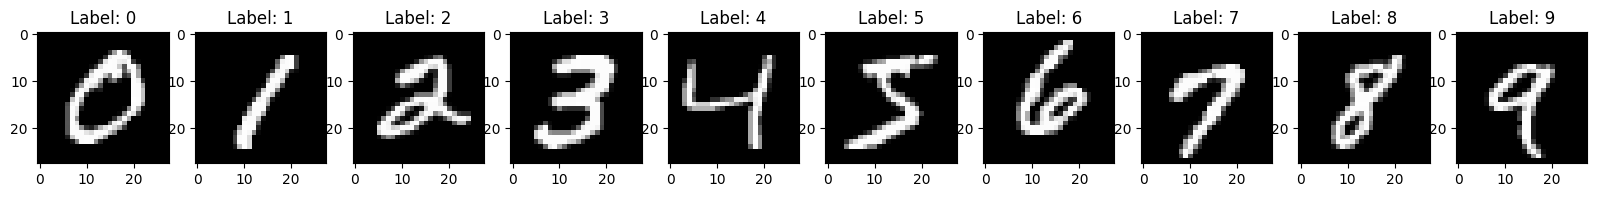

In [4]:
num_classes = 10
f, ax = plt.subplots(nrows=1, ncols=num_classes, figsize=(20,20))

for i in range(0, num_classes):
  img_sample = X_train[y_train == i][0]
  ax[i].imshow(img_sample, cmap='gray')
  ax[i].set_title('Label: ' + str(i))


IndexError: ignored

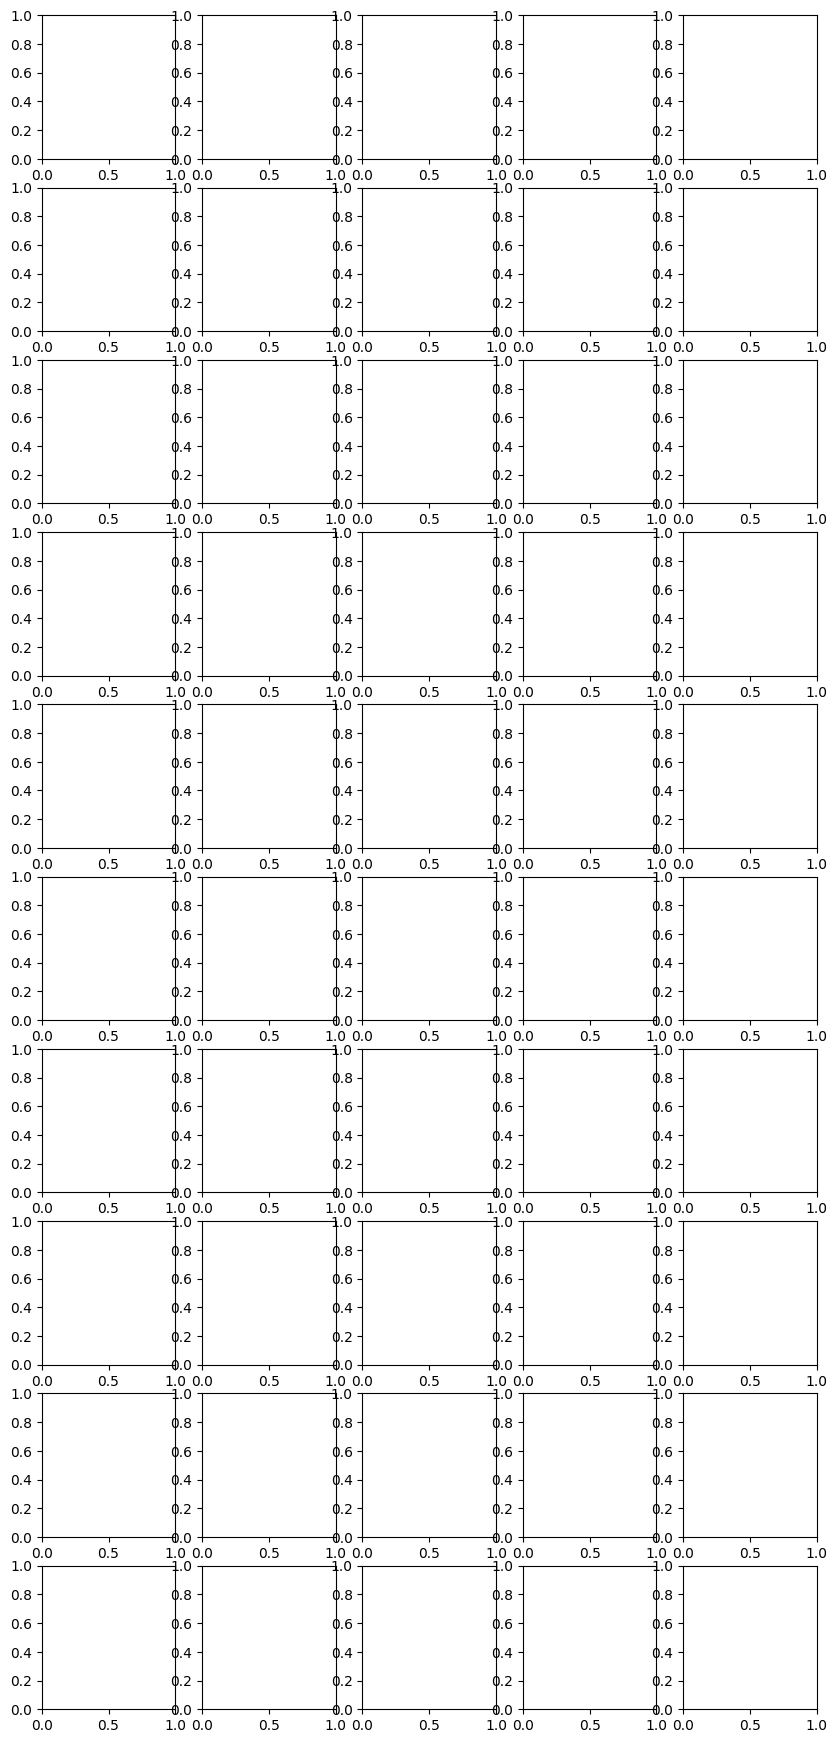

In [21]:
label_to_sample = 10
f, ax = plt.subplots(nrows=label_to_sample, ncols=5, figsize=(10,22))

for i in range(0, label_to_sample):
  img_sample = X_train[y_train == i][:5]
  for j in range(0, 5):
      ax[i][j].imshow(img_sample[j], cmap='gray')
      ax[i][j].set_title(f'label: {str(i)}\nsample:{str(j)}', fontsize=9)
      ax[i][j].axis('off')

## Prepare Data

In [6]:
X_train = X_train / 225
X_test = X_test / 225
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
X_test , X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(5000, 784)
(5000, 10)
(5000, 784)
(5000, 10)


## Model Creation

### Fully Connected Neural Network

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [44]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2858 - accuracy: 0.9143 - val_loss: 0.1125 - val_accuracy: 0.9656
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1272 - accuracy: 0.9622 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0959 - accuracy: 0.9729 - val_loss: 0.0775 - val_accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0768 - accuracy: 0.9767 - val_loss: 0.0817 - val_accuracy: 0.9772
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.1010 - val_accuracy: 0.9742
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.0758 - val_accuracy: 0.9804
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0811 - val_acc

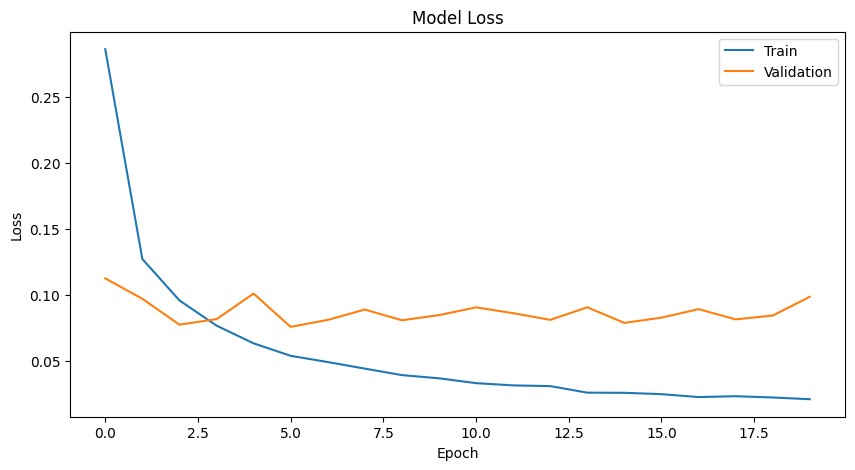

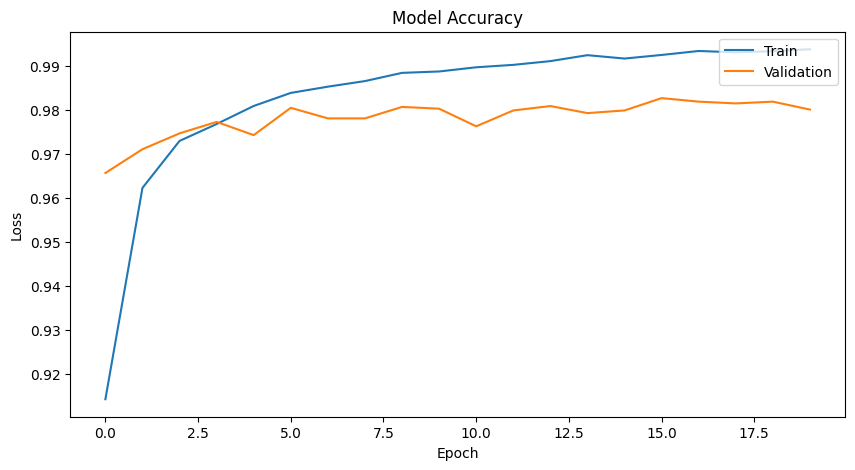

In [45]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [46]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9790


[0.10790007561445236, 0.9789999723434448]

In [53]:
X_test[0].shape

(784,)

In [58]:
predictions = model.predict([X_test])

157/157 [==============================] - 0s 2ms/step


In [59]:
predicted_class = tf.argmax(predictions, axis=-1).numpy()
predicted_class

array([5, 2, 9, ..., 1, 1, 6])

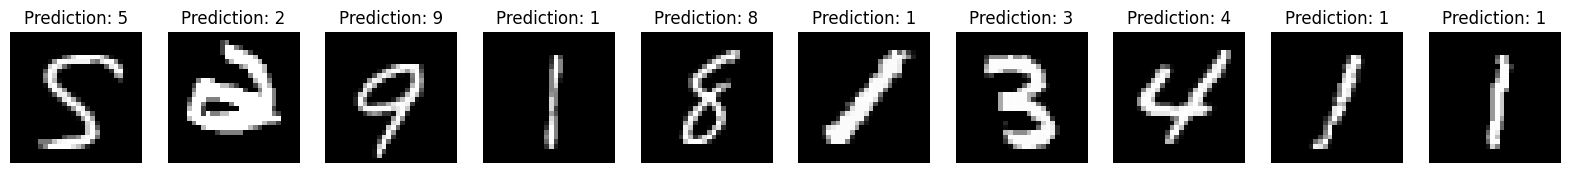

In [65]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,20))

for i in range(0, 10):
    img_sample = X_test[i].reshape(28, 28)
    ax[i].imshow(img_sample, cmap='gray')
    ax[i].set_title(f'Prediction: {predicted_class[i]}', fontsize=12)
    ax[i].axis('off')

plt.show()